In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/air/data_f.csv')
data

,x-axis,y-axis,z-axis,number
0,1.569064,1.019892,10.355822,0
1,-1.216025,-1.647517,14.082349,0
2,-2.588956,-3.020448,14.239256,0
3,-4.354153,-3.491167,15.063014,0
4,-4.040340,-3.491167,14.278482,0
...,...,...,...,...
530975,-4.785645,1.686744,7.845320,9
530976,-4.824872,1.686744,7.806093,9
530977,-4.824872,1.647517,7.923773,9
530978,-4.785645,1.647517,7.806093,9


In [4]:
df=pd.DataFrame(data)
df

,x-axis,y-axis,z-axis,number
0,1.569064,1.019892,10.355822,0
1,-1.216025,-1.647517,14.082349,0
2,-2.588956,-3.020448,14.239256,0
3,-4.354153,-3.491167,15.063014,0
4,-4.040340,-3.491167,14.278482,0
...,...,...,...,...
530975,-4.785645,1.686744,7.845320,9
530976,-4.824872,1.686744,7.806093,9
530977,-4.824872,1.647517,7.923773,9
530978,-4.785645,1.647517,7.806093,9


In [5]:
df['number'].value_counts()

5    53278
4    53245
8    53225
3    53208
9    53198
7    53067
6    53024
2    52995
0    52970
1    52770
Name: number, dtype: int64

## Standardized data

In [6]:
from sklearn.preprocessing import StandardScaler
x=df[['x-axis','y-axis','z-axis']]
y=df['number']
scaler=StandardScaler()
X=scaler.fit_transform(x)


In [7]:
scaled_X=pd.DataFrame(data=X,columns=['x-axis','y-axis','z-axis'])
scaled_X['number']=y.values

scaled_X

,x-axis,y-axis,z-axis,number
0,1.095757,0.014281,0.582334,0
1,0.062762,-0.628696,1.685685,0
2,-0.446461,-0.959640,1.732142,0
3,-1.101176,-1.073106,1.976040,0
4,-0.984782,-1.073106,1.743756,0
...,...,...,...,...
530975,-1.261218,0.175025,-0.160976,9
530976,-1.275767,0.175025,-0.172590,9
530977,-1.275767,0.165569,-0.137747,9
530978,-1.261218,0.165569,-0.172590,9


In [8]:
df

,x-axis,y-axis,z-axis,number
0,1.569064,1.019892,10.355822,0
1,-1.216025,-1.647517,14.082349,0
2,-2.588956,-3.020448,14.239256,0
3,-4.354153,-3.491167,15.063014,0
4,-4.040340,-3.491167,14.278482,0
...,...,...,...,...
530975,-4.785645,1.686744,7.845320,9
530976,-4.824872,1.686744,7.806093,9
530977,-4.824872,1.647517,7.923773,9
530978,-4.785645,1.647517,7.806093,9


In [9]:
import scipy.stats as stats

In [10]:
fs=20
frame_size=fs*10
hop_size=fs*2

In [11]:
def get_frames(df,frame_size,hop_size):
    N_FEATURES=3
    
    frames=[]
    lables=[]
    for i in range(0,len(df)-frame_size,hop_size):
        x=df['x-axis'].values[i: i+frame_size]
        y=df['y-axis'].values[i: i+frame_size]
        z=df['z-axis'].values[i: i+frame_size]   
        
        lable = stats.mode(df['number'][i: i+frame_size])[0][0]
        frames.append([x,y,z])
        lables.append(lable)
    frames=np.asarray(frames).reshape(-1,frame_size,N_FEATURES)
    lables=np.asarray(lables)
    
    return frames ,lables

In [12]:
X_x,Y_y=get_frames(df,frame_size,hop_size)

In [13]:
X_x.shape , Y_y.shape

((13270, 200, 3), (13270,))

In [14]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [15]:
X_train , X_test, y_train, y_test = train_test_split(X_x,Y_y,test_size=0.2,random_state=0,stratify=Y_y)

In [16]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((2654, 200, 3), (10616, 200, 3), (2654,), (10616,))

In [19]:
X_test= X_test.reshape(2654, 200, 3, 1)
X_train=X_train.reshape(10616, 200, 3, 1)

In [20]:
X_test.shape,X_train.shape

((2654, 200, 3, 1), (10616, 200, 3, 1))

In [ ]:
X_test

### 2D CNN Model

In [21]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam , RMSprop

In [22]:
model=Sequential()
model.add(Conv2D(16, (2,2), activation = 'relu', input_shape= X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2,2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=5, validation_data= (X_test, y_test),verbose=1)

Epoch 1/10
2124/2124 [==============================] - 32s 14ms/step - loss: 1.7124 - accuracy: 0.3258 - val_loss: 1.0445 - val_accuracy: 0.6443
Epoch 2/10
2124/2124 [==============================] - 29s 13ms/step - loss: 1.1782 - accuracy: 0.5457 - val_loss: 0.6442 - val_accuracy: 0.8165
Epoch 3/10
2124/2124 [==============================] - 28s 13ms/step - loss: 0.9878 - accuracy: 0.6248 - val_loss: 0.4538 - val_accuracy: 0.8866
Epoch 4/10
2124/2124 [==============================] - 29s 14ms/step - loss: 0.8678 - accuracy: 0.6776 - val_loss: 0.4111 - val_accuracy: 0.9084
Epoch 5/10
2124/2124 [==============================] - 31s 15ms/step - loss: 0.7995 - accuracy: 0.7005 - val_loss: 0.3258 - val_accuracy: 0.9258
Epoch 6/10
2124/2124 [==============================] - 28s 13ms/step - loss: 0.7292 - accuracy: 0.7257 - val_loss: 0.3020 - val_accuracy: 0.9292
Epoch 7/10
2124/2124 [==============================] - 29s 13ms/step - loss: 0.6632 - accuracy: 0.7477 - val_loss: 0.2522 -

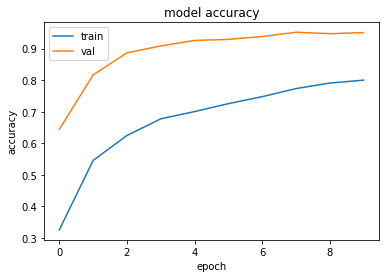

In [34]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
model.save('/content/drive/MyDrive/air/model.h5',save_format='h5')
# !ls /content/drive/MyDrive/air/

 data.csv     digits.csv  'Screenshot 2023-02-07 at 12.19.55 AM.png'
 data_f.csv   model.h5	   train_xyz.csv


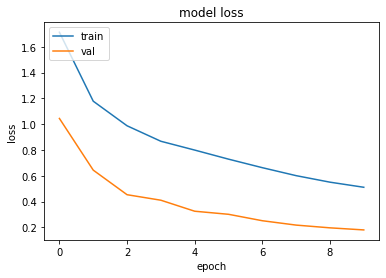

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
